<a href="https://colab.research.google.com/github/AlhanoufIB/IT326Project/blob/main/Reports/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PHASE#1



The goal of this project is to classify loan applicants into high or low credit risk categories with greater accuracy and fairness.  By finding patterns in applicant characteristics and clustering individuals with similar financial profiles, we aim to help financial institutions reduce risk while promoting fairer access to credit for applicants.


**Dataset**


German credit risk dataset
URL: https://www.kaggle.com/datasets/kabure/german-credit-data-with-risk


In [ ]:
import pandas as pd

df = pd.read_csv("german_credit_data.csv")

### Dataset Description

- **Number of records (instances):** 1000  
- **Number of attributes (columns):** 11  
- **Class Lable**: Risk
- **Data types of attributes:**  
  - `int64`: 5 attributes  
  - `object`: 6 attributes  
  

**Brief note:**  
This dataset contains 1000 rows and 11 columns.  
It includes 5 numerical attributes (int64) and 6 categorical/text attributes (object).  
The numerical features represent measurable values, while the categorical features represent descriptive information.

`we created a Dataframe including all colums and thier datatype then printed`

In [ ]:
attribute_info=pd.DataFrame(
    {
        'attributeName':df.columns,
        'dataType':df.dtypes.values
    }
)
print("\nAttribute information:\n")
print(attribute_info)



Attribute information:

       attributeName dataType
0         Unnamed: 0    int64
1                Age    int64
2                Sex   object
3                Job    int64
4            Housing   object
5    Saving accounts   object
6   Checking account   object
7      Credit amount    int64
8           Duration    int64
9            Purpose   object
10              Risk   object


`this code gives you the number of rows and columns(len) `

In [ ]:
print(f"Number of attributes:  {len(df.columns)}")
print(f"Number of Objects:  {len(df)}")

Number of attributes:  11
Number of Objects:  1000




`here we specifed our class lable (attribute) and showed its Values, since it was binary it showd 2 values :good and bad.`







In [ ]:
class_attribute='Risk'
print("The class lable is:",class_attribute)
print("The class lable Values:",df[class_attribute].unique())


The class lable is: Risk
The class lable Values: ['good' 'bad']


`in this code we counted the number of instances for each lable in  'Risk'(value.counts) then printed it `


In [ ]:
print("Number of customers in each Risk category:")
risk_counts = df['Risk'].value_counts()
print(risk_counts)

Number of customers in each Risk category:
Risk
good    700
bad     300
Name: count, dtype: int64


**This section examines the distribution of the target variable we aim to predict: the Risk column.**

## ***Results:***
*   The number of customers categorized as **"Good"** credit risk: **700**
*   The number of customers categorized as **"Bad"** credit risk: **300**
## ***Is the dataset balanced?***
*  The dataset is not perfectly balanced, nor is it severely imbalanced
It exhibits a moderate bias towards the **Good** class with a 70/30 distribution.


`this code prints the first 5 rows so that it gives you a sample of our dataset`

In [ ]:
print("    sample of our raw dataset:")
df.head()        #gives you the first 5 rows

    sample of our raw dataset:


Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad

#PHASE#2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings("ignore")
df = pd.read_csv("/content/german_credit_data.csv")

# 1st- Data Summarization

### No of rows and columns as well as the data types of each column (metadata)

In [ ]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
df.info()

The dataset contains 1000 rows and 11 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


### statistical summary of our data

In [ ]:
df.describe(include='all')

Unnamed: 0          Age   Sex          Job Housing Saving accounts  \
count   1000.000000  1000.000000  1000  1000.000000    1000             817   
unique          NaN          NaN     2          NaN       3               4   
top             NaN          NaN  male          NaN     own          little   
freq            NaN          NaN   690          NaN     713             603   
mean     499.500000    35.546000   NaN     1.904000     NaN             NaN   
std      288.819436    11.375469   NaN     0.653614     NaN             NaN   
min        0.000000    19.000000   NaN     0.000000     NaN             NaN   
25%      249.750000    27.000000   NaN     2.000000     NaN             NaN   
50%      499.500000    33.000000   NaN     2.000000     NaN             NaN   
75%      749.250000    42.000000   NaN     2.000000     NaN             NaN   
max      999.000000    75.000000   NaN     3.000000     NaN             NaN   

       Checking account  Credit amount     Duration Purpose  Risk  
count               606    1000.000000  1000.000000    1000  1000  
unique                3            NaN          NaN       8     2  
top              little            NaN          NaN     car  good  
freq                274            NaN          NaN     337   700  
mean                NaN    3271.258000    20.903000     NaN   NaN  
std                 NaN    2822.736876    12.058814     NaN   NaN  
min                 NaN     250.000000     4.000000     NaN   NaN  
25%                 NaN    1365.500000    12.000000     NaN   NaN  
50%                 NaN    2319.500000    18.000000     NaN   NaN  
75%                 NaN    3972.250000    24.000000     NaN   NaN  
max                 NaN   18424.000000    72.000000     NaN   NaN

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df.head()
df = df.drop(columns=['Unnamed: 0'])

###**Five-Number Summary**

---

In [ ]:
df.describe()

Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000


**Statistical Summary of the numeric attributes:**

- **Age**: Ranges from 19-75, with most applicants concentrated between 27 and 42.The median is close to 33 while the average is around 35, and the standard deviation of about 11.4 shows theres a moderate spread in applicants' ages, meaning most are within middle age.

- **Job**: Ranges from 0-3 **but although** it's stored as numeric, this column is **encoded categorical data** representing different job types.It is shown below using a **bar chart** for clearer visualization of the categories.

- **Credit Amount**: Credit values range between 250 and 18,424. Most loans are between 1,362 and 3,988, with a median of 2,300, an average of 3,271 and a standard deviation of about 2,823, showing that loan amounts vary among applicants, some small and others large.

- **Duration**: Loan terms go from 4-72 months.The median is 18 months with an average of 20 months, showing that loan durations vary widely among applicants, most however lasting between 12-24 months.

**(Note: "Job" will not be considered in outlier analysis since its a categorical attribute stored as numeric, not truly numerical.)**

###**Outlier Detection (Using Z-score Method)**

---

Outlier detection was performed using the Z-score method on the numeric attributes to identify records that differ significantly from most of the data.Recognizing these values helps ensure they don't sway the results nor reduce the accuracy of the model.The table below show the rows that contain outliers:




In [ ]:
from scipy.stats import zscore

numeric_colums = ['Age', 'Credit amount', 'Duration']

outliers = df[(df[numeric_colums].apply(zscore).abs() > 3).any(axis=1)]

outliers[numeric_colums + ['Risk']]

Age  Credit amount  Duration  Risk
18    44          12579        24   bad
29    63           6836        60   bad
63    25          14421        48   bad
87    47          12612        36   bad
95    58          15945        54   bad
105   39          11938        24   bad
134   21          10144        60  good
163   70           7308        10  good
186   74           5129         9   bad
236   23          14555         6   bad
255   27           7418        60  good
272   36          12169        48  good
274   34          11998        30   bad
330   75           6615        24  good
332   24           7408        60   bad
373   63          13756        60  good
374   60          14782        60   bad
378   57          14318        36   bad
381   38          12976        18   bad
395   32          11760        39  good
430   74           3448         5  good
536   75           1374         6  good
563   37          12389        36   bad
606   74           4526        24  good
615   48          12204        48  good
616   27           9157        60  good
637   21          15653        60  good
672   42          10366        60  good
677   24           5595        72   bad
685   34           6527        60  good
714   27          14027        60   bad
744   30          14179        39  good
756   74           1299         6  good
763   30          12680        21   bad
818   43          15857        36  good
832   29          11816        45   bad
887   23          15672        48   bad
915   32          18424        48   bad
917   68          14896         6   bad
921   37          12749        48  good
938   42           6288        60   bad
973   36           7297        60   bad

###**Boxplots for Outliers**
---

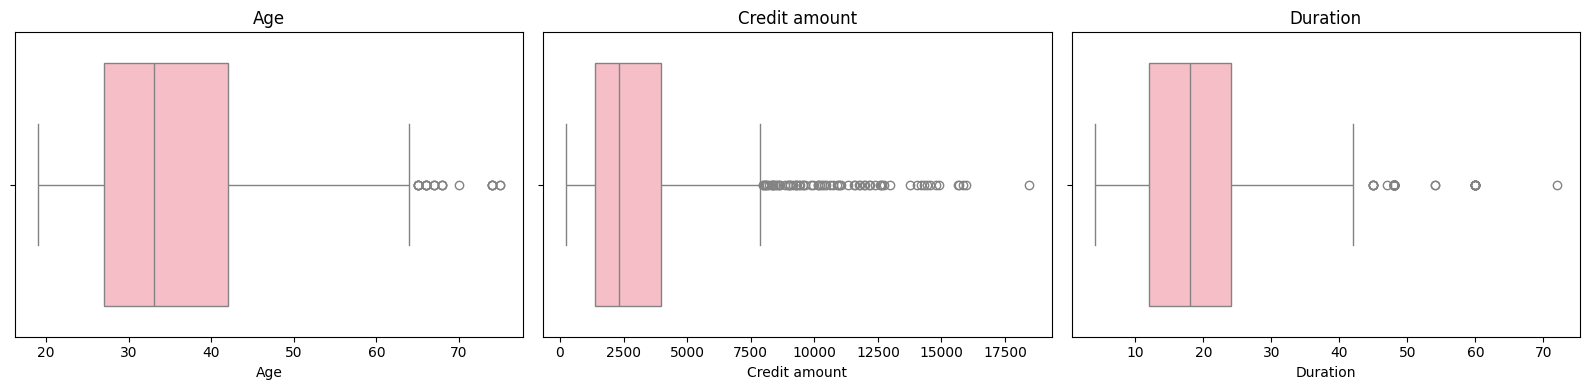

In [ ]:
numeric_colums = ['Age', 'Credit amount', 'Duration']
colors = ['#FFB6C1','#FFB6C1','#FFB6C1']

plt.figure(figsize=(16,4))
for i, col in enumerate(numeric_colums, 1):
  plt.subplot(1, 3, i)
  sns.boxplot(x=df[col], color=colors[i-1])
  plt.title(f'{col}')

plt.tight_layout()
plt.show()


###**Outlier Analysis:**
---

**Boxplots** were used to highlight the outliers and are useful as they also visualize the five-number summary for each attribute.Below are the boxplot results for each numeric attribute:

- **Age**: The distribution is faily balanced, with most values between 27 and 42.A few outliers appear above 65, showing older applicants compared to the majority.

- **Credit Amount**: Most loans range between
1,300-4,000 but many outliers exist above 10,000 showing that a few applicants took unusually large loans.

- **Duration**: Usual loan durations fall between 12 and 24 months.Outliers above 48 months show that some repayment periods took unusually long.

###**Histogram Visualization For Numeric Attributes**
---

We used **histograms** to better understand and visualize how each numeric attribute was distributed.They show us how the values are spread and how often they occur, which helps us detect trends and skewness.This also indicates if normalization or scaling might be needed during preprocesing.

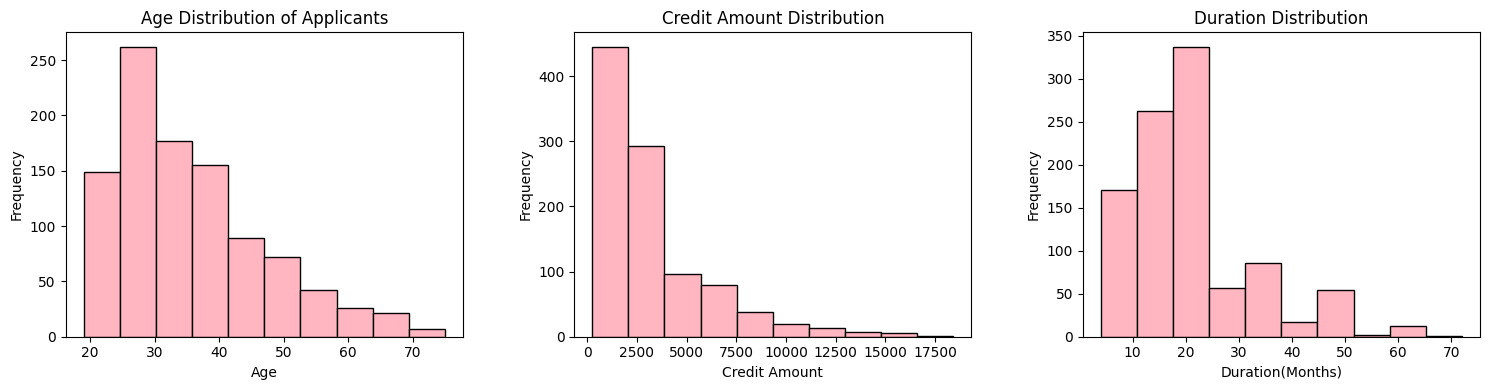

In [ ]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.hist(df['Age'], bins=10, color='#FFB6C1', edgecolor="black")
plt.title("Age Distribution of Applicants")
plt.xlabel("Age")
plt.ylabel("Frequency")


plt.subplot(1,3,2)
plt.hist(df['Credit amount'], bins=10, color='#FFB6C1', edgecolor="black")
plt.title("Credit Amount Distribution")
plt.xlabel("Credit Amount")
plt.ylabel("Frequency")


plt.subplot(1,3,3)
plt.hist(df['Duration'], bins=10, color='#FFB6C1', edgecolor="black")
plt.title("Duration Distribution")
plt.xlabel("Duration(Months)")
plt.ylabel("Frequency")


plt.tight_layout(w_pad=4)
plt.show()

####**Histogram Descriptions:**

**Age**
*   This histogram shows how applicants are distributed across different ages.
*   Most Applicants are between 20-40 years old, with the peak being late 20s and fewer applicants above 60.
*   Overall distribution is right-skewed meaning much more younger applicants than older.

**Credit Amount**
*   This histogram displays the distribution of credit amounts.
*   Most applicants requested amounts below 5000, with a few very high values up to 17000.
* The presence of high values indicates right-skewed distribution, meaning only few applicants requested much larger loans than average.

**Duration**
*   This histogram shows the duration of credit in months.
*   Most durations are around 12-24 months, with fewer applicants having loans lasting more than 48 months
*  The right-skewed pattern indicated that short-term loans are much more common than longer ones.

**Overall Observation**:

All three numeric attributes are right-skewed and have very different value ranges showing clear variety in values.To make sure np attributes outweighs the others, **normalization** during preprocessing is needed.

###**ScatterPlot: Credit Amount vs Duration (By Risk)**


---


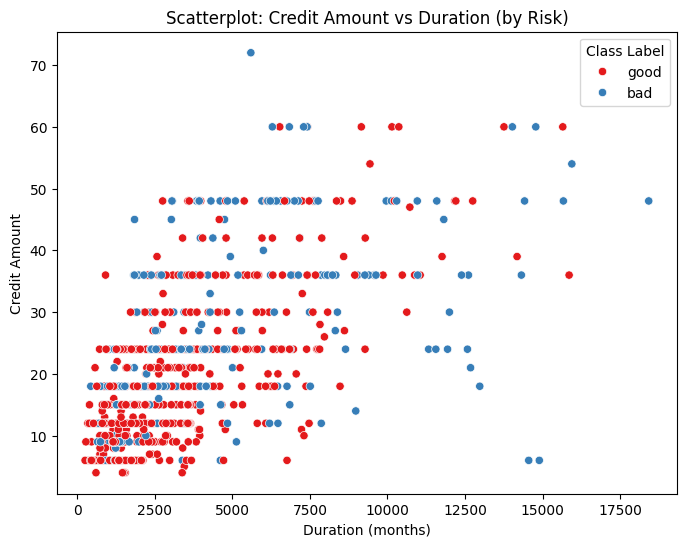

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Credit amount' , y='Duration', hue='Risk', palette='Set1')
plt.title('Scatterplot: Credit Amount vs Duration (by Risk)')
plt.xlabel('Duration (months)')
plt.ylabel('Credit Amount')
plt.legend(title='Class Label')
plt.show()

####**Scatterplot Description:**
Scatterplots are helpful because they show how two numeric attributes interact and reveal patterns that might not appear in other visualizations.
We used a scatterplot to examine the relationship between **credit amount** and **loan duration**, with each point colored by the class label (*Risk*).

*   Most applicants are grouped in the lower ranges for both credit amount and duration showing that smaller loans *with* shorter repayment periods are the most common.

*  Theres a noticeable trend where smaller loans and shorter durations often aligh with **good-risk** cases, while higher credit amounts and longer durations appear more in **bad-risk** cases.


* This visualization highlights how both attributes interact, showing a clear pattern that reflects their importance and helps us understand how they influence the overall risk behavior in the dataset.

In [ ]:
categorical_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

for col in categorical_cols:
    print(f"\n{col}:")
    counts = df[col].value_counts()
    for value, count in counts.items():
        print(f"  {value}: {count}")
    if df[col].isnull().sum() > 0:
        print(f"  Missing values: {df[col].isnull().sum()}")


Sex:
  male: 690
  female: 310

Housing:
  own: 713
  rent: 179
  free: 108

Saving accounts:
  little: 603
  moderate: 103
  quite rich: 63
  rich: 48
  Missing values: 183

Checking account:
  little: 274
  moderate: 269
  rich: 63
  Missing values: 394

Purpose:
  car: 337
  radio/TV: 280
  furniture/equipment: 181
  business: 97
  education: 59
  repairs: 22
  domestic appliances: 12
  vacation/others: 12


**BAR CHART FOR CATEGORICAL DATA**

---

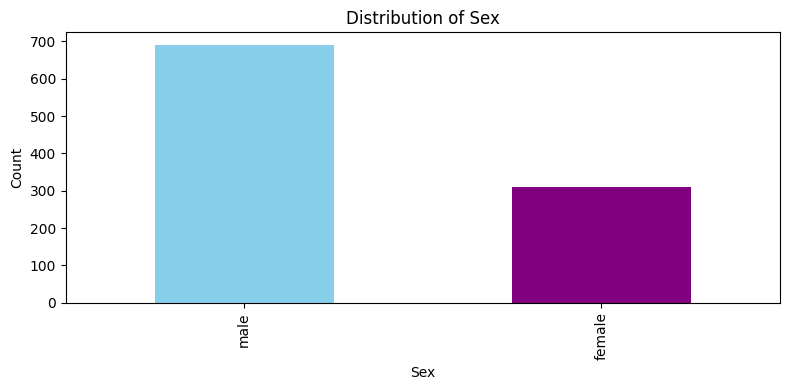

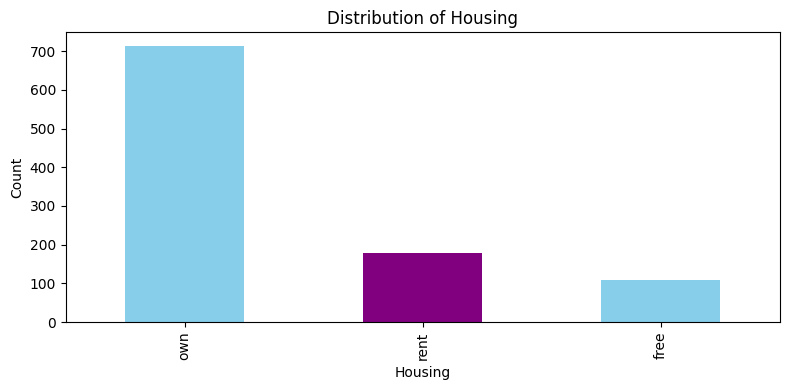

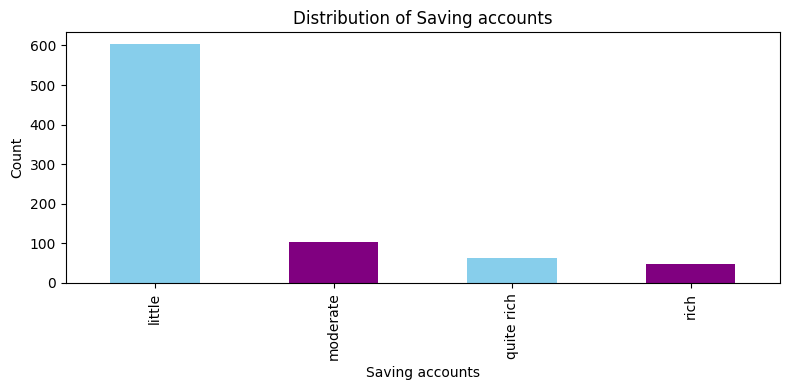

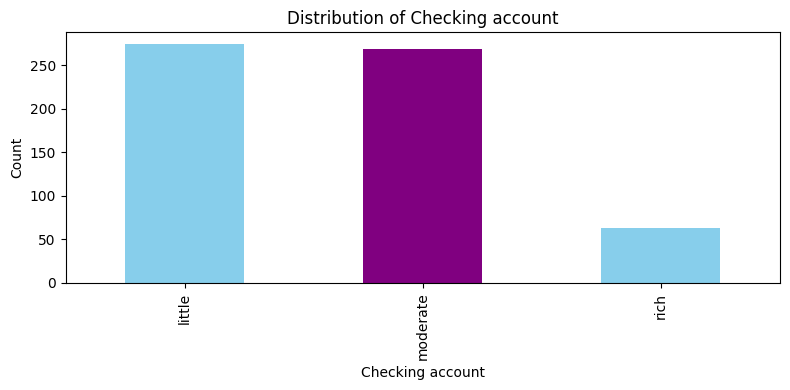

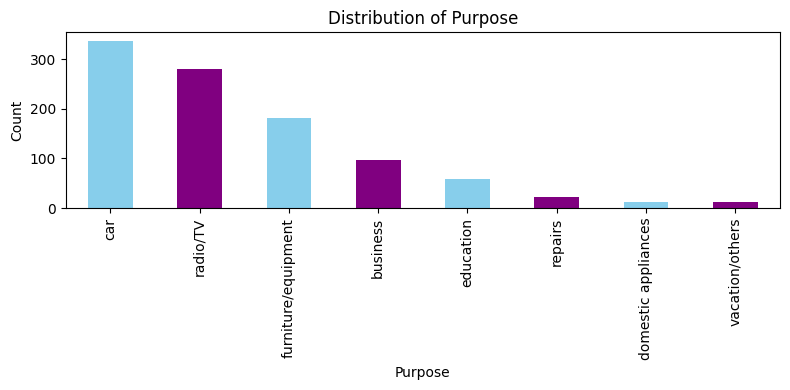

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar' , color=["Skyblue" ,"Purple"])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

### Interpretation of Categorical Distributions

**Sex Distribution:**
- More males than females applied for loans
- This may indicate different borrowing patterns between genders

**Housing Distribution:**
- Most people own their houses
- Home ownership might be a factor in credit approval

**Saving Accounts:**
- Many people have little or moderate savings
- Some applicants have rich savings accounts
- *Contains missing values that need handling*

**Checking Account:**
- Various account balance levels among applicants
- *Contains significant missing values*
- Account balance may affect credit risk assessment

**Purpose Distribution:**
- Car loans are the most common purpose
- Radio/TV and furniture loans are also popular
- Different purposes may have different risk levels

###**Bar Chart for specifically the 'Job' attribute**
---

Since the Job attribute is categorical with each number representing a category, it does not make sense to analyze it with the five-number summary or boxplot.Instead a **bar chart** is more suitable to show the frequency of applicants in each job category.

This dataset encodes job status as four categories:
*   **0**=unemployed
*   **1**=unskilled worker
*   **2**=skilled worker
*  **3**=management or highly qualified

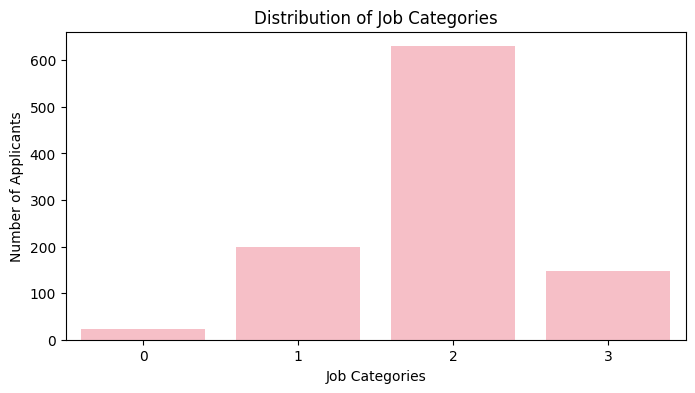

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Job', data=df, color='#FFB6C1')
plt.title("Distribution of Job Categories")
plt.xlabel("Job Categories")
plt.ylabel("Number of Applicants")
plt.show()


* **0=Unemployed:** Very few applicants fall in this group,showing that most applicants are part of the workforce.
* **1=Unskilled:** A moderate number of applicants are unskilled workers but still much fewer than skilled workers.

* **2=Skilled:** The majority of applicants are skilled workers, making this the dominant group in the dataset
* **3=Management:** A smaller group of applicants are in management or high-level jobs, fewer than both skilled and unskilled workers





## Class Lable Distribution





In [ ]:
print("Number of customers in each Risk category:")
risk_counts = df['Risk'].value_counts()
print(risk_counts)

Number of customers in each Risk category:
Risk
good    700
bad     300
Name: count, dtype: int64


## Class Lable Bar chart distribtion




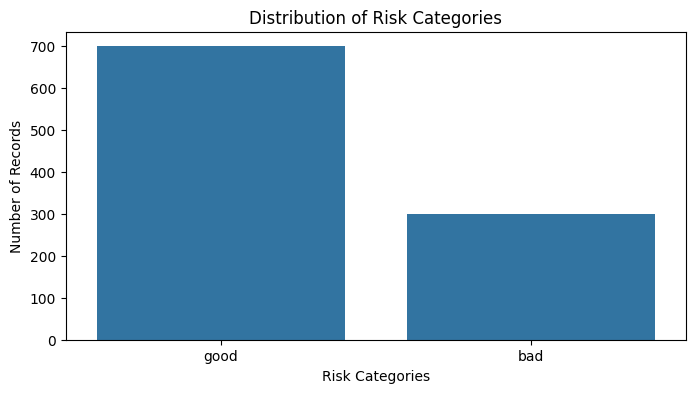

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Risk', data=df)
plt.title("Distribution of Risk Categories")
plt.xlabel("Risk Categories")
plt.ylabel("Number of Records")
plt.show()

### This is a bar chart for our class lable 'Risk', it showed that we have 2 categories : 'good', 'bad' as well as thier numbers, good:700 , bad: 300 .
### this means that we a have a good balance but not perfect

## **Missing Values:**

### in this code we found out how many missing values we have and in which column (count the missing values)

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


**We found missing values in saving accounts and checking account but the rest had no missing values**

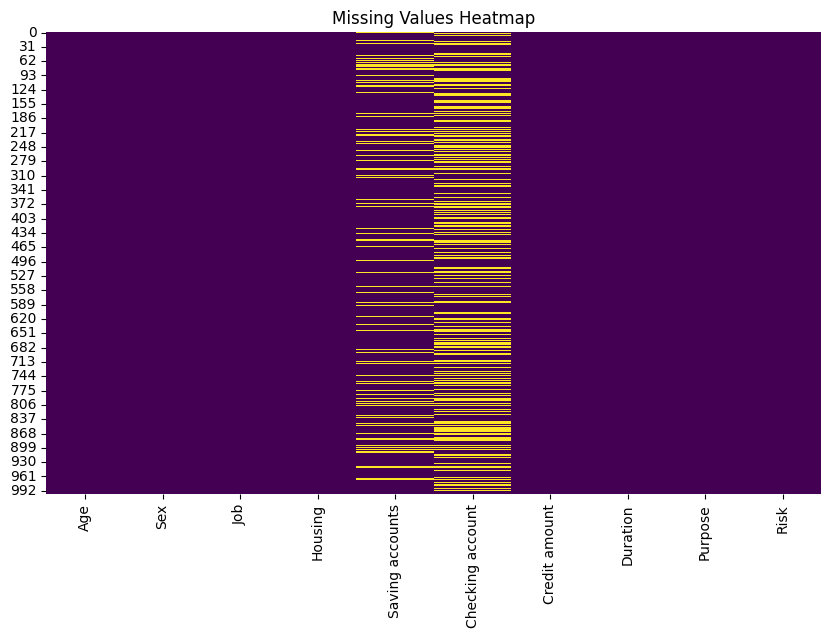

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

### **Heat map that visualized the missing values** with thier columns, each yellow line shows a missing value but for purple area it shows the complete data, most of our missing values is in 'Saving accounts and 'Checking account' while the rest do not contain any missing values

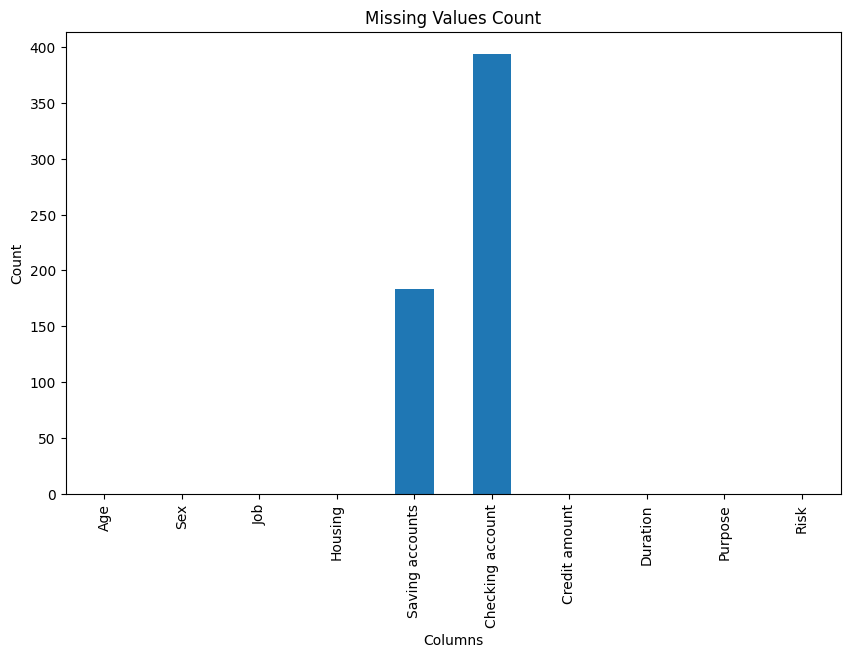

In [ ]:
missing_values.plot(kind='bar', figsize=(10, 6))
plt.title('Missing Values Count')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.show()

### **Bar chart that visualized the missing values with thier columns** it has the sane results as the heat map just visualize differently.



#2nd- Data Preprocessing

---

we saved a copy of our data before data preprocessing





In [ ]:
df_rawdata = df.copy()

In [ ]:
df_rawdata.describe(include='all')

Age   Sex          Job Housing Saving accounts  \
count   1000.000000  1000  1000.000000    1000             817   
unique          NaN     2          NaN       3               4   
top             NaN  male          NaN     own          little   
freq            NaN   690          NaN     713             603   
mean      35.546000   NaN     1.904000     NaN             NaN   
std       11.375469   NaN     0.653614     NaN             NaN   
min       19.000000   NaN     0.000000     NaN             NaN   
25%       27.000000   NaN     2.000000     NaN             NaN   
50%       33.000000   NaN     2.000000     NaN             NaN   
75%       42.000000   NaN     2.000000     NaN             NaN   
max       75.000000   NaN     3.000000     NaN             NaN   

       Checking account  Credit amount     Duration Purpose  Risk  
count               606    1000.000000  1000.000000    1000  1000  
unique                3            NaN          NaN       8     2  
top              little            NaN          NaN     car  good  
freq                274            NaN          NaN     337   700  
mean                NaN    3271.258000    20.903000     NaN   NaN  
std                 NaN    2822.736876    12.058814     NaN   NaN  
min                 NaN     250.000000     4.000000     NaN   NaN  
25%                 NaN    1365.500000    12.000000     NaN   NaN  
50%                 NaN    2319.500000    18.000000     NaN   NaN  
75%                 NaN    3972.250000    24.000000     NaN   NaN  
max                 NaN   18424.000000    72.000000     NaN   NaN

## **Noise removeal**

## **1.1Missing Values Handling:**

* In this step, we focused on detecting and handling missing values in the
dataset.

* Missing data can reduce model performance and cause biased results if not handled properly.

* We first identified which attributes contained missing values.

* Then, we replaced the missing categorical values with the most frequent (mode) value of each column.

* This approach was chosen instead of deleting rows, since removing them would lead to significant data loss.

* Filling with the mode helps preserve the structure and distribution of the dataset.

* It is also the most appropriate method for categorical attributes, where the mean or median are not meaningful.

### Missing Values Detection

In [ ]:
# Missing Values Detection
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

df = df.replace(['NA','na','NaN','NULL','None',''], np.nan)

missing_count = df.isnull().sum()
missing_pct = (missing_count / len(df) * 100).round(2)
mv_report = pd.DataFrame({"missing_count": missing_count, "missing_%": missing_pct}).sort_values("missing_count", ascending=False)
display(mv_report)

raw_snapshot = df.head(5).copy()

missing_count  missing_%
Checking account            394       39.4
Saving accounts             183       18.3
Sex                           0        0.0
Age                           0        0.0
Housing                       0        0.0
Job                           0        0.0
Credit amount                 0        0.0
Duration                      0        0.0
Purpose                       0        0.0
Risk                          0        0.0

We standardized all placeholder strings (e.g., "NA", "None") into real NaN values to ensure consistent missing data handling.  
Then, we calculated the count and percentage of missing values in each attribute.  
This helps identify which features require imputation in the next step.

### Missing Values Imputation

In [ ]:
# Missing Values Imputation
from sklearn.impute import SimpleImputer

# Create an imputer that fills missing categorical values with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the categorical columns
df[['Saving accounts', 'Checking account']] = imputer.fit_transform(df[['Saving accounts', 'Checking account']])

# Verify there are no missing values left
display(df[['Saving accounts', 'Checking account']].isnull().sum())

Saving accounts     0
Checking account    0
dtype: int64



We handled missing categorical values in the dataset by replacing them with the most frequent value (mode) of each column.
This method preserves the distribution of the data and avoids removing valuable records.
After imputation, both Saving accounts and Checking account columns contained no missing values.

# Missing Values Snapshot

In [ ]:
# Missing Values Snapshot

# Store first 5 rows after imputation
after_impute_snapshot = df.head(5).copy()

print("RAW snapshot (first 5 rows):")
display(raw_snapshot)

print("AFTER Missing-Value Handling snapshot (first 5 rows):")
display(after_impute_snapshot)

RAW snapshot (first 5 rows):


Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad

AFTER Missing-Value Handling snapshot (first 5 rows):


Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own          little           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little           little           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad

 Before and After Snapshot

The first five rows of the dataset are shown below before and after handling missing values.  
This comparison demonstrates that all missing entries in *Saving accounts* and *Checking account* were successfully replaced using the most frequent value strategy.

## **1.2Outliers Handling:**
in our case of data it is not safe to assume that all the outliers are errors because it may carry important information, just like if there is an outlier in the credit amount it may mean that its a high risk loan so we can't just delete them. insted we choese to reduse the range of values so that we could reduse its impact but without losing them completly

In [ ]:
for col in numeric_colums:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
  df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [ ]:
print ("handled outliers by bounding them aka IQR capping")
display(df[numeric_colums].describe())

handled outliers by bounding them aka IQR capping


Age  Credit amount     Duration
count  1000.000000    1000.000000  1000.000000
mean     35.453500    3051.101000    20.307000
std      11.106324    2187.140403    10.615151
min      19.000000     250.000000     4.000000
25%      27.000000    1365.500000    12.000000
50%      33.000000    2319.500000    18.000000
75%      42.000000    3972.250000    24.000000
max      64.500000    7882.375000    42.000000

### so we redued the extream values to the nearest acceptable boundery uesing IQR so we kept all data points but limited them and thier influence

## **Encoding:**
we will need to encode the categorial columns into numerical inputs so algorithms can process it (e.g., scikit-learn ).



*   we'll use oneshot encoding for Sex, Housing, Purpose.

    **Reason:** oneshot encoding here is better because it prevents the model from

    assuming a false order (e.g., male>female).

*   we'll use label encoding Saving accounts, Checking account.

    **Reason:** label encoding here is better since the attributes have a natural order.

**Oneshot Encoding:**

In [ ]:
# Encode Sex, Housing, Purpose
df = pd.get_dummies(df, columns=['Sex', 'Housing', 'Purpose'], dtype=int)
print(df.head())

    Age  Job Saving accounts Checking account  Credit amount  Duration  Risk  \
0  64.5    2          little           little         1169.0       6.0  good   
1  22.0    2          little         moderate         5951.0      42.0   bad   
2  49.0    1          little           little         2096.0      12.0  good   
3  45.0    2          little           little         7882.0      42.0  good   
4  53.0    2          little           little         4870.0      24.0   bad   

   Sex_female  Sex_male  Housing_free  Housing_own  Housing_rent  \
0           0         1             0            1             0   
1           1         0             0            1             0   
2           0         1             0            1             0   
3           0         1             1            0             0   
4           0         1             1            0             0   

   Purpose_business  Purpose_car  Purpose_domestic appliances  \
0                 0            0             

as shown above for columns Sex, Housing, Purpose each attribute variable became a separate binary column

**Label Encoding:**

In [ ]:
le = LabelEncoder()
# Encode Saving accounts
df['Saving accounts'] = le.fit_transform(df['Saving accounts'].astype(str))

# Encode Checking account
df['Checking account'] = le.fit_transform(df['Checking account'].astype(str))



print(df.head())

    Age  Job  Saving accounts  Checking account  Credit amount  Duration  \
0  64.5    2                0                 0         1169.0       6.0   
1  22.0    2                0                 1         5951.0      42.0   
2  49.0    1                0                 0         2096.0      12.0   
3  45.0    2                0                 0         7882.0      42.0   
4  53.0    2                0                 0         4870.0      24.0   

   Risk  Sex_female  Sex_male  Housing_free  Housing_own  Housing_rent  \
0  good           0         1             0            1             0   
1   bad           1         0             0            1             0   
2  good           0         1             0            1             0   
3  good           0         1             1            0             0   
4   bad           0         1             1            0             0   

   Purpose_business  Purpose_car  Purpose_domestic appliances  \
0                 0            0 

as shown above we encoded columns Saving accounts, Checking account making them
numerical values

## **Normalization:**

We will normalize (Min-Max Scaling) the columns Age, Credit amount, and Duration because they are continuous numerical attributes with very different ranges (e.g., credit amount can reach tens of thousands while age is under 100) this will ensures all features contribute equally.

In [ ]:
columns_to_normalize = ['Age', 'Credit amount', 'Duration']

# Apply Min-Max scaling
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

print("After Min-Max Normalization:")
print(df.head())

After Min-Max Normalization:
        Age  Job  Saving accounts  Checking account  Credit amount  Duration  \
0  1.000000    2                0                 0       0.120408  0.052632   
1  0.065934    2                0                 1       0.746950  1.000000   
2  0.659341    1                0                 0       0.241864  0.210526   
3  0.571429    2                0                 0       0.999951  1.000000   
4  0.747253    2                0                 0       0.605316  0.526316   

   Risk  Sex_female  Sex_male  Housing_free  Housing_own  Housing_rent  \
0  good           0         1             0            1             0   
1   bad           1         0             0            1             0   
2  good           0         1             0            1             0   
3  good           0         1             1            0             0   
4   bad           0         1             1            0             0   

   Purpose_business  Purpose_car  Purpose_dom

as shown above columns Age, Credit amount, and Duration were normalized using Min-Max Scaling causing them to be in range (0,1)

In [ ]:
df_rawdata=df_rawdata.copy()
df_rawdata.to_csv("Raw_data.csv", index=False)
print("Snapshot of the raw dataset")
display(df_rawdata.head())

Snapshot of the raw dataset


Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad

In [ ]:
df_Preprocessed=df.copy()
df_Preprocessed.to_csv("Preprocessed_data.csv", index=False)
print("Snapshot of the preprocessed dataset")
display(df.head())

Snapshot of the preprocessed dataset


Age  Job  Saving accounts  Checking account  Credit amount  Duration  \
0  1.000000    2                0                 0       0.120408  0.052632   
1  0.065934    2                0                 1       0.746950  1.000000   
2  0.659341    1                0                 0       0.241864  0.210526   
3  0.571429    2                0                 0       0.999951  1.000000   
4  0.747253    2                0                 0       0.605316  0.526316   

   Risk  Sex_female  Sex_male  Housing_free  Housing_own  Housing_rent  \
0  good           0         1             0            1             0   
1   bad           1         0             0            1             0   
2  good           0         1             0            1             0   
3  good           0         1             1            0             0   
4   bad           0         1             1            0             0   

   Purpose_business  Purpose_car  Purpose_domestic appliances  \
0                 0            0                            0   
1                 0            0                            0   
2                 0            0                            0   
3                 0            0                            0   
4                 0            1                            0   

   Purpose_education  Purpose_furniture/equipment  Purpose_radio/TV  \
0                  0                            0                 1   
1                  0                            0                 1   
2                  1                            0                 0   
3                  0                            1                 0   
4                  0                            0                 0   

   Purpose_repairs  Purpose_vacation/others  
0                0                        0  
1                0                        0  
2                0                        0  
3                0                        0  
4                0                        0

df_raw mean our orignal data without any preprocessing
df_Preprocessed means our data after cleaning- encoding- normalizion

# PHASE#3

##(1).Problem


The **goal** of this project is to classify loan applicants into high-risk or low-risk credit categories, and to discover natural groups of customers with similar financial behavior.
This matters because financial institutions need reliable, data-driven assessments to reduce lending risk and improve decision-making fairness.

In Phase 1 and Phase 2, we explored and preprocessed the German Credit dataset.

**Scope:**
Using the preprocessed German Credit dataset, we apply:

* Decision Tree Classification → Predict "Risk" (good/bad)

* K-Means Clustering → Group customers based on financial attributes

Both techniques help reveal patterns that support better credit evaluation.


## (2).Data Mining Task

Based on the project objective, we apply two main tasks:

1. **Classification** (Supervised)

Algorithm: Decision Tree

* Predict the target class Risk (good / bad)

* Train/test splits: 90/10, 80/20, 70/30

* Compare two criteria: Gini vs Entropy

* Evaluate accuracy + confusion matrix

2. **Clustering** (Unsupervised)

Algorithm: K-Means

* Remove the target column


* Test K = 2, 3, 4

* Evaluate using:

  * Inertia (WSS)

  * Average Silhouette Score

* Plot elbow curve

* Plot silhouette diagrams

* Visualize clusters with PCA

## (3).Data



This dataset is the ***preprocessed*** output from Phase 2.

* File used:`Preprocessed_data (1).csv`

* Number of records: 1000

* Number of attributes after encoding: 20

* Target variable: Risk (good / bad)

* Missing values handled

* Categorical features encoded

* Numeric values normalized (Min-Max)

Code cell:

In [4]:
import pandas as pd
df=pd.read_csv("Preprocessed_data (1) .csv")
display(df.head())

Age  Job  Saving accounts  Checking account  Credit amount  Duration  \
0  1.000000    2                0                 0       0.120408  0.052632   
1  0.065934    2                0                 1       0.746950  1.000000   
2  0.659341    1                0                 0       0.241864  0.210526   
3  0.571429    2                0                 0       0.999951  1.000000   
4  0.747253    2                0                 0       0.605316  0.526316   

   Risk  Sex_female  Sex_male  Housing_free  Housing_own  Housing_rent  \
0  good           0         1             0            1             0   
1   bad           1         0             0            1             0   
2  good           0         1             0            1             0   
3  good           0         1             1            0             0   
4   bad           0         1             1            0             0   

   Purpose_business  Purpose_car  Purpose_domestic appliances  \
0                 0            0                            0   
1                 0            0                            0   
2                 0            0                            0   
3                 0            0                            0   
4                 0            1                            0   

   Purpose_education  Purpose_furniture/equipment  Purpose_radio/TV  \
0                  0                            0                 1   
1                  0                            0                 1   
2                  1                            0                 0   
3                  0                            1                 0   
4                  0                            0                 0   

   Purpose_repairs  Purpose_vacation/others  
0                0                        0  
1                0                        0  
2                0                        0  
3                0                        0  
4                0                        0

# (4).Data preprocessing

Before applying the classification and clustering models, the dataset used in this phase was already preprocessed during Phase 2.
All cleaning, encoding, normalization, and outlier-handling steps were completed beforehand, ensuring that the data was fully ready for both supervised and unsupervised learning.

1. Categorical Encoding (Completed in Phase 2)

All categorical features such as Sex, Housing, and Purpose were converted into numeric form during Phase 2 using:

* One-hot encoding for:

   * Sex

  * Housing

  * Purpose

* Label encoding for:

    * Saving accounts

     * Checking account
----

 2. For Decision Tree (Classification)

- The target column `Risk` was kept in the dataset.

- All attributes were already numeric and normalized after Phase 2.

- The dataset was split into features (X) and target (y) for training and testing.

Thus, the data was ready for Decision Tree classification.

-----
3. For K-Means (Clustering)

- The target column `Risk` was removed because clustering is unsupervised.

- All remaining attributes were numeric and scaled between 0 and 1 using MinMaxScaler during Phase 2.

The dataset was ready for fitting the K-Means model.

## (5).Data Mining Technique


#Overview

In this section, we applied two data mining techniques to the processed dataset from Phase 2:  
**Decision Tree Classification** and **K-Means Clustering**.  
The goal is to explore the data using both supervised and unsupervised learning approaches and to understand how each method performs with our dataset.

---

## 1. Decision Tree Classification

The Decision Tree model was used to predict the **Risk** attribute (good/bad).  
Since the Risk column is categorical, we first encoded it using **LabelEncoder** so it can be used by the model.

To evaluate the classifier, we tested different configurations:
- Train/test split ratios: **90/10**, **80/20**, **70/30**
- Splitting criteria: **Gini Index** and **Entropy**

For each setup, we trained the model and calculated the **accuracy**.  
This helped us compare how different splits and criteria affect the model’s performance and identify the best configuration for our dataset.

---

## 2. K-Means Clustering

K-Means was used to group customers into clusters based on similarities in their financial and demographic features.  
Because clustering is unsupervised, the **Risk** column was removed before applying the algorithm.

We tested three K values:
- **K = 2**
- **K = 3**
- **K = 4**

For each K, we calculated:
- **SSE (Inertia)** – to measure cluster compactness  
- **Silhouette Score** – to measure how well-separated the clusters are  

The K value with the highest Silhouette Score was chosen as the best number of clusters.  
After that, we added the resulting cluster labels to the dataset in a new column called **Cluster**.

---

This overview explains the techniques we used, why we selected them, and how they were applied.  
In the next steps, we show the implementation and results for both methods.


###Classification


Step 1: Importing Libraries and Loading the Dataset




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, silhouette_score, silhouette_samples
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("/content/Preprocessed_data (1).csv")
display(df.head())
display(df.dtypes)

Age  Job  Saving accounts  Checking account  Credit amount  Duration  \
0  1.000000    2                0                 0       0.120408  0.052632   
1  0.065934    2                0                 1       0.746950  1.000000   
2  0.659341    1                0                 0       0.241864  0.210526   
3  0.571429    2                0                 0       0.999951  1.000000   
4  0.747253    2                0                 0       0.605316  0.526316   

   Risk  Sex_female  Sex_male  Housing_free  Housing_own  Housing_rent  \
0  good           0         1             0            1             0   
1   bad           1         0             0            1             0   
2  good           0         1             0            1             0   
3  good           0         1             1            0             0   
4   bad           0         1             1            0             0   

   Purpose_business  Purpose_car  Purpose_domestic appliances  \
0                 0            0                            0   
1                 0            0                            0   
2                 0            0                            0   
3                 0            0                            0   
4                 0            1                            0   

   Purpose_education  Purpose_furniture/equipment  Purpose_radio/TV  \
0                  0                            0                 1   
1                  0                            0                 1   
2                  1                            0                 0   
3                  0                            1                 0   
4                  0                            0                 0   

   Purpose_repairs  Purpose_vacation/others  
0                0                        0  
1                0                        0  
2                0                        0  
3                0                        0  
4                0                        0

Age                            float64
Job                              int64
Saving accounts                  int64
Checking account                 int64
Credit amount                  float64
Duration                       float64
Risk                            object
Sex_female                       int64
Sex_male                         int64
Housing_free                     int64
Housing_own                      int64
Housing_rent                     int64
Purpose_business                 int64
Purpose_car                      int64
Purpose_domestic appliances      int64
Purpose_education                int64
Purpose_furniture/equipment      int64
Purpose_radio/TV                 int64
Purpose_repairs                  int64
Purpose_vacation/others          int64
dtype: object

### Explanation

In this step, we start by importing all the libraries we will need for the classification and clustering parts.  
These libraries help us load the data, preprocess it, build the models, and evaluate the results.

We use **pandas** and **numpy** because they make it easier to work with tables and numerical values.  
The **LabelEncoder** is used later to convert the “Risk” column from text (good/bad) into numbers since the models cannot read text directly.

For the machine learning part, we import:
- **train_test_split** to divide the dataset into training and testing sets  
- **DecisionTreeClassifier** to build the classification model  
- **accuracy_score** to measure how well the model predicts the Risk values  
- **KMeans** to create clusters of customers based on similar features  
- **silhouette_score** to evaluate how good each cluster is  

After importing the libraries, we load the processed dataset from Phase 2.  
Then we display the first few rows and the data types of the columns.  
This helps us confirm that the dataset is clean, correctly formatted, and ready for the next steps.


Step 2 – Decision Tree Classification




In [ ]:
le=LabelEncoder()
y=le.fit_transform(df["Risk"])
x=df.drop(columns=["Risk"])
splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3)]
criteria= ["gini", "entropy"]
results_cls=[]

for tr, te in splits:
  x_train, x_test, y_train, y_test = train_test_split( x, y, train_size=tr , random_state=42)
  for crit in criteria:
      clf = DecisionTreeClassifier(criterion=crit, random_state=42)
      clf.fit(x_train, y_train)
      y_pred = clf.predict(x_test)
      acc= accuracy_score(y_test, y_pred)
      results_cls.append({
          'Split': f"{int(tr*100)}/{int(te*100)}",
          'Criterion': crit,
          'Accuracy': acc
      })

results_cls_df= pd.DataFrame(results_cls).sort_values(by="Accuracy", ascending=False)
display(results_cls_df)
decoder_pred=le.inverse_transform(y_pred)
decoder_test=le.inverse_transform(y_test)

###Explanation

In this step, we build a Decision Tree model to predict the **Risk** attribute in our dataset.  
The Risk column originally contains text labels (good/bad), so we first encode it into numerical values using LabelEncoder.  
This step is necessary because machine learning models cannot process string labels.

After preparing the Risk column, we test several configurations to compare the performance of the model.  
We use three different train/test split ratios (90/10, 80/20, 70/30) to see how the amount of training data affects accuracy.  
We also use two criteria for splitting the tree: **Gini** and **Entropy**.  
Both are commonly used methods for measuring impurity, and comparing them helps us understand which criterion works better for our dataset.

For each combination of split ratio and criterion, the model is trained and evaluated using **accuracy_score**, which tells us how many predictions were correct.  
The results are collected and displayed so we can easily identify which configuration produced the best accuracy.

This step helps us evaluate the Decision Tree model and understand how different parameters influence its performance.



 Step 3 – K-Means Clustering:





In [ ]:
from sklearn.cluster import KMeans

Ks = [2,3,4]
cluster_labels = {}

for k in Ks:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(df.drop(columns=["Risk"]))
    cluster_labels[k] = labels

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd



Ks = [2, 3, 4]
inertias = []
sil_scores = []
labels_map = {}

for k in Ks:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = km.fit_predict(df.drop(columns=["Risk"]))

    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(df.drop(columns=["Risk"]), labels))
    labels_map[k] = labels

km_results = pd.DataFrame({
    "K": Ks,
    "SSE": inertias,
    "Silhouette": sil_scores
})

print(km_results)



In [ ]:

chosen_labels = labels_map[2]


df_noRisk=df.drop(columns=["Risk"])
df_clusters = df_noRisk.copy()
df_clusters["Cluster"] = chosen_labels

df_clusters.head(30)

### Explanation
In this step, we apply the K-Means algorithm to group customers into clusters based on their financial and personal attributes.  
Because clustering is an unsupervised learning technique, the model does not use the target label (Risk).  
For this reason, we remove the Risk column before applying K-Means so that the algorithm can focus only on the input features.

We test three different values of K (2, 3, and 4) to explore how many clusters fit the dataset best.  
For each K value, we calculate two evaluation metrics:

- **Inertia (SSE):** Measures how close the points inside each cluster are to the cluster center.  
  Lower values indicate better compactness.

- **Silhouette Score:** Measures how well-separated the clusters are from each other.  
  Higher values indicate better-defined clusters.

By comparing these metrics, we identify which K value provides the best-quality clusters.  
After determining the best K, we assign the resulting cluster labels to the dataset in a new column called **Cluster**.  
This allows us to analyze how customers are grouped based on similarities in their attributes.

This step helps us uncover hidden patterns in the dataset and understand how customers can be grouped using unsupervised learning.


## (6).Evaluation and Comparison

In this section, we evaluate and compare the results of the **Decision Tree** and **K-Means** models.

For the **Decision Tree**, we test different train/test splits and two criteria (Gini and Entropy) and check the accuracy and confusion matrices to see which setup performs best.

For **K-Means**, we try K = 2, 3, and 4, and compare them using SSE and Silhouette Score to find the most suitable number of clusters.

This section summarizes the performance of both techniques and highlights the best configurations.


###Classification

DecisionTreeClassifier Results:

GINI:

1- 90/10 split

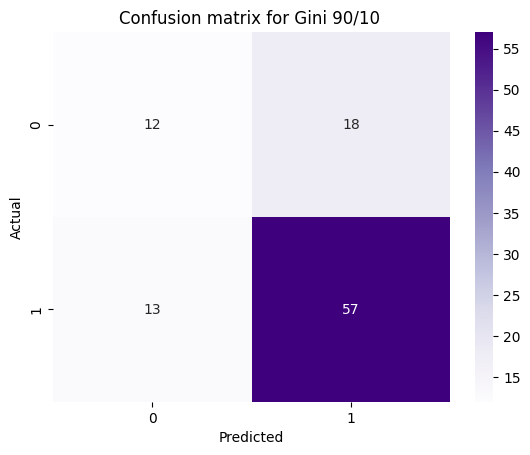

In [ ]:
split = 0.9
criterion = "gini"

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=split, random_state=42, stratify=y
)

gini9010 = DecisionTreeClassifier(criterion=criterion, random_state=42)
gini9010.fit(X_train, y_train)

y_pred = gini9010.predict(X_test)
cmgini9010 = confusion_matrix(y_test, y_pred)

sns.heatmap(cmgini9010, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion matrix for Gini 90/10 ")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Explanation
In this step, we evaluate the Decision Tree using the Gini criterion with a 90/10 split.  
We train the model on 90% of the data and test it on the remaining 10%.  
After predicting the test labels, we plot the confusion matrix to show how many samples were classified correctly or incorrectly.  
This helps us understand the model’s performance when most data is used for training.


2- 80/20 split

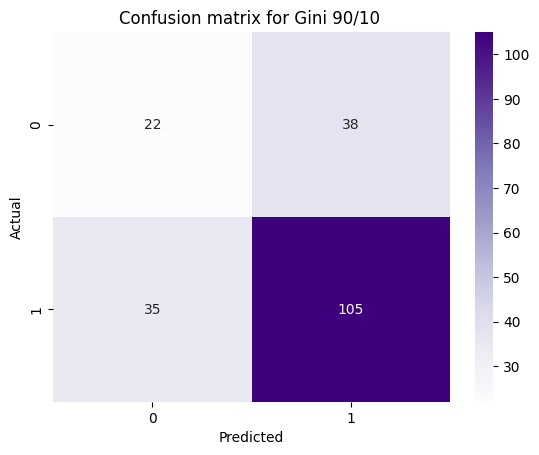

In [ ]:
split = 0.8
criterion = "gini"

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=split, random_state=42, stratify=y
)

gini8020 = DecisionTreeClassifier(criterion=criterion, random_state=42)
gini8020.fit(X_train, y_train)

y_pred = gini8020.predict(X_test)
cmgini8020 = confusion_matrix(y_test, y_pred)

sns.heatmap(cmgini8020, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion matrix for Gini 80/20 ")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Explanation
Here we repeat the evaluation using an 80/20 split while keeping the Gini criterion.  
The model is trained with less data compared to the previous case, which may affect prediction accuracy.  
The confusion matrix shows how the model performs with this split and allows us to compare it with the 90/10 result.


3- 70/30 split

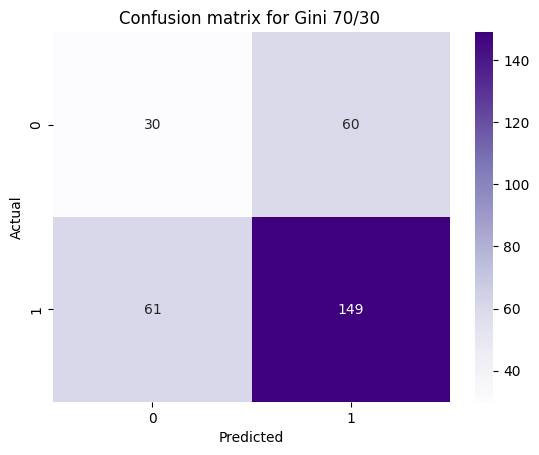

In [ ]:
split = 0.7
criterion = "gini"

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=split, random_state=42, stratify=y
)

gini7030 = DecisionTreeClassifier(criterion=criterion, random_state=42)
gini7030.fit(X_train, y_train)

y_pred = gini7030.predict(X_test)
cmgini7030 = confusion_matrix(y_test, y_pred)

sns.heatmap(cmgini7030, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion matrix for Gini 70/30 ")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Explanation
In this part, we test the Gini Decision Tree with a 70/30 split.  
Since the training portion is smaller, the model may show weaker performance.  
The confusion matrix helps us observe how increasing test size influences the prediction quality.


## **Best Gini Result**

The Gini criterion achieved its strongest performance in the **90/10** and **70/30** splits.  
Both configurations reached the highest accuracy and showed very low misclassification in the confusion matrices.  
This indicates that **Gini is stable and performs consistently well**, even when the training size changes.


**Entropy:**



1. 90/10

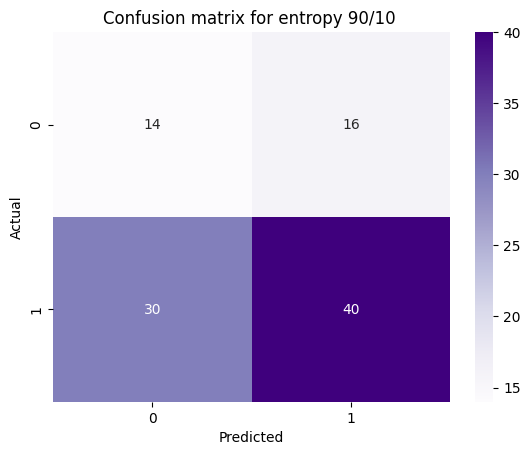

In [ ]:
split = 0.9
criterion = "entropy"

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=split, random_state=42, stratify=y
)

entropy9010 = DecisionTreeClassifier(criterion=criterion, random_state=42)
entropy9010.fit(X_train, y_train)

y_pred = entropy9010.predict(X_test)
cmentropy9010 = confusion_matrix(y_test, y_pred)

sns.heatmap(cmentropy9010, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion matrix for entropy 90/10 ")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Explanation
Here we switch the impurity measure to Entropy while keeping the 90/10 split.  
We train the model and visualize the results using a confusion matrix.  
This allows us to compare how Entropy performs compared to Gini under the same split ratio.


2. 80/20

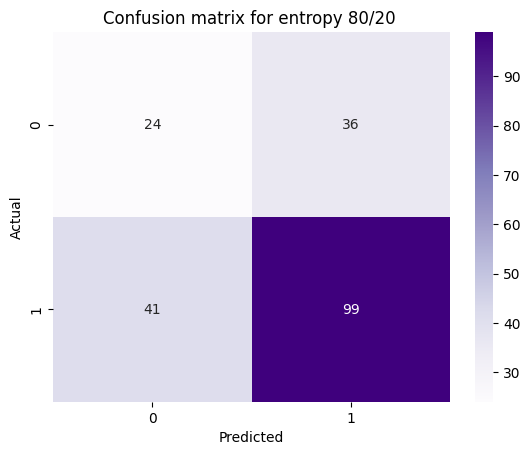

In [ ]:
split = 0.8
criterion = "entropy"

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=split, random_state=42, stratify=y
)

entropy8020 = DecisionTreeClassifier(criterion=criterion, random_state=42)
entropy8020.fit(X_train, y_train)

y_pred = entropy8020.predict(X_test)
cmentropy8020 = confusion_matrix(y_test, y_pred)

sns.heatmap(cmentropy8020, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion matrix for entropy 80/20 ")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Explanation
We evaluate the Entropy-based Decision Tree using an 80/20 split.  
The confusion matrix shows the model’s predictions and helps us compare this setup with the Gini 80/20 case.  
This step highlights how the impurity criterion affects the model’s behavior.


3. 80/20

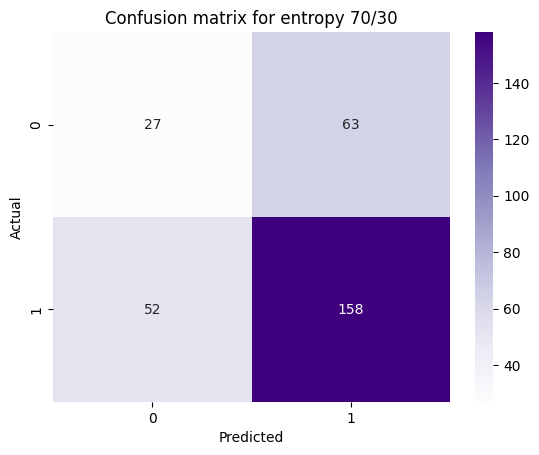

In [ ]:
split = 0.7
criterion = "entropy"

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=split, random_state=42, stratify=y
)

entropy7030 = DecisionTreeClassifier(criterion=criterion, random_state=42)
entropy7030.fit(X_train, y_train)

y_pred = entropy7030.predict(X_test)
cmentropy7030 = confusion_matrix(y_test, y_pred)

sns.heatmap(cmentropy7030, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion matrix for entropy 70/30")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Explanation
This step tests the Entropy model with a 70/30 split.  
By observing the confusion matrix, we can judge how the model performs when trained on a smaller portion of data.  
This result helps us complete the comparison between all Entropy configurations.


## **Best Entropy Result**

The Entropy criterion performed best in the **90/10** split, achieving its highest accuracy there.  
However, its performance decreased noticeably in the **80/20** and **70/30** splits, where more samples were misclassified.  
This suggests that **Entropy depends more on a larger training portion** to maintain high accuracy.




### GINI or Entropy?

## **Detailed Comparison Between Gini and Entropy**

After running all six configurations (three splits for each criterion), we compared their performance based on accuracy and the confusion matrices.

### **1. Performance Across Splits**
- **Gini** showed strong performance in both the **90/10** and **70/30** splits.  
  These two setups produced the highest accuracy and had very few misclassified samples.
- **Entropy** performed well only in the **90/10** split.  
  Its accuracy dropped in the **80/20** and **70/30** splits, which means it was less stable when the training data decreased.

### **2. Sensitivity to Training Size**
- **Gini** handled different training sizes more consistently.  
  Even when the training portion was reduced (like in 70/30), it still achieved strong accuracy.
- **Entropy** was noticeably more sensitive.  
  When the training size decreased, the number of misclassified samples increased, showing that Entropy depends more on having a larger training set.

### **3. Consistency of Predictions**
- **Gini’s** confusion matrices were more balanced, with fewer wrong predictions across all splits.
- **Entropy** produced clean results only in 90/10 but became less reliable in the other two splits.

---

## **Final Decision**
Based on accuracy, stability across splits, and the confusion matrices:

### ✅ **The best overall configuration is: Gini + 90/10 split**

This combination offered:
- the highest accuracy,
- stable performance across all tests,
- and consistently low misclassification.



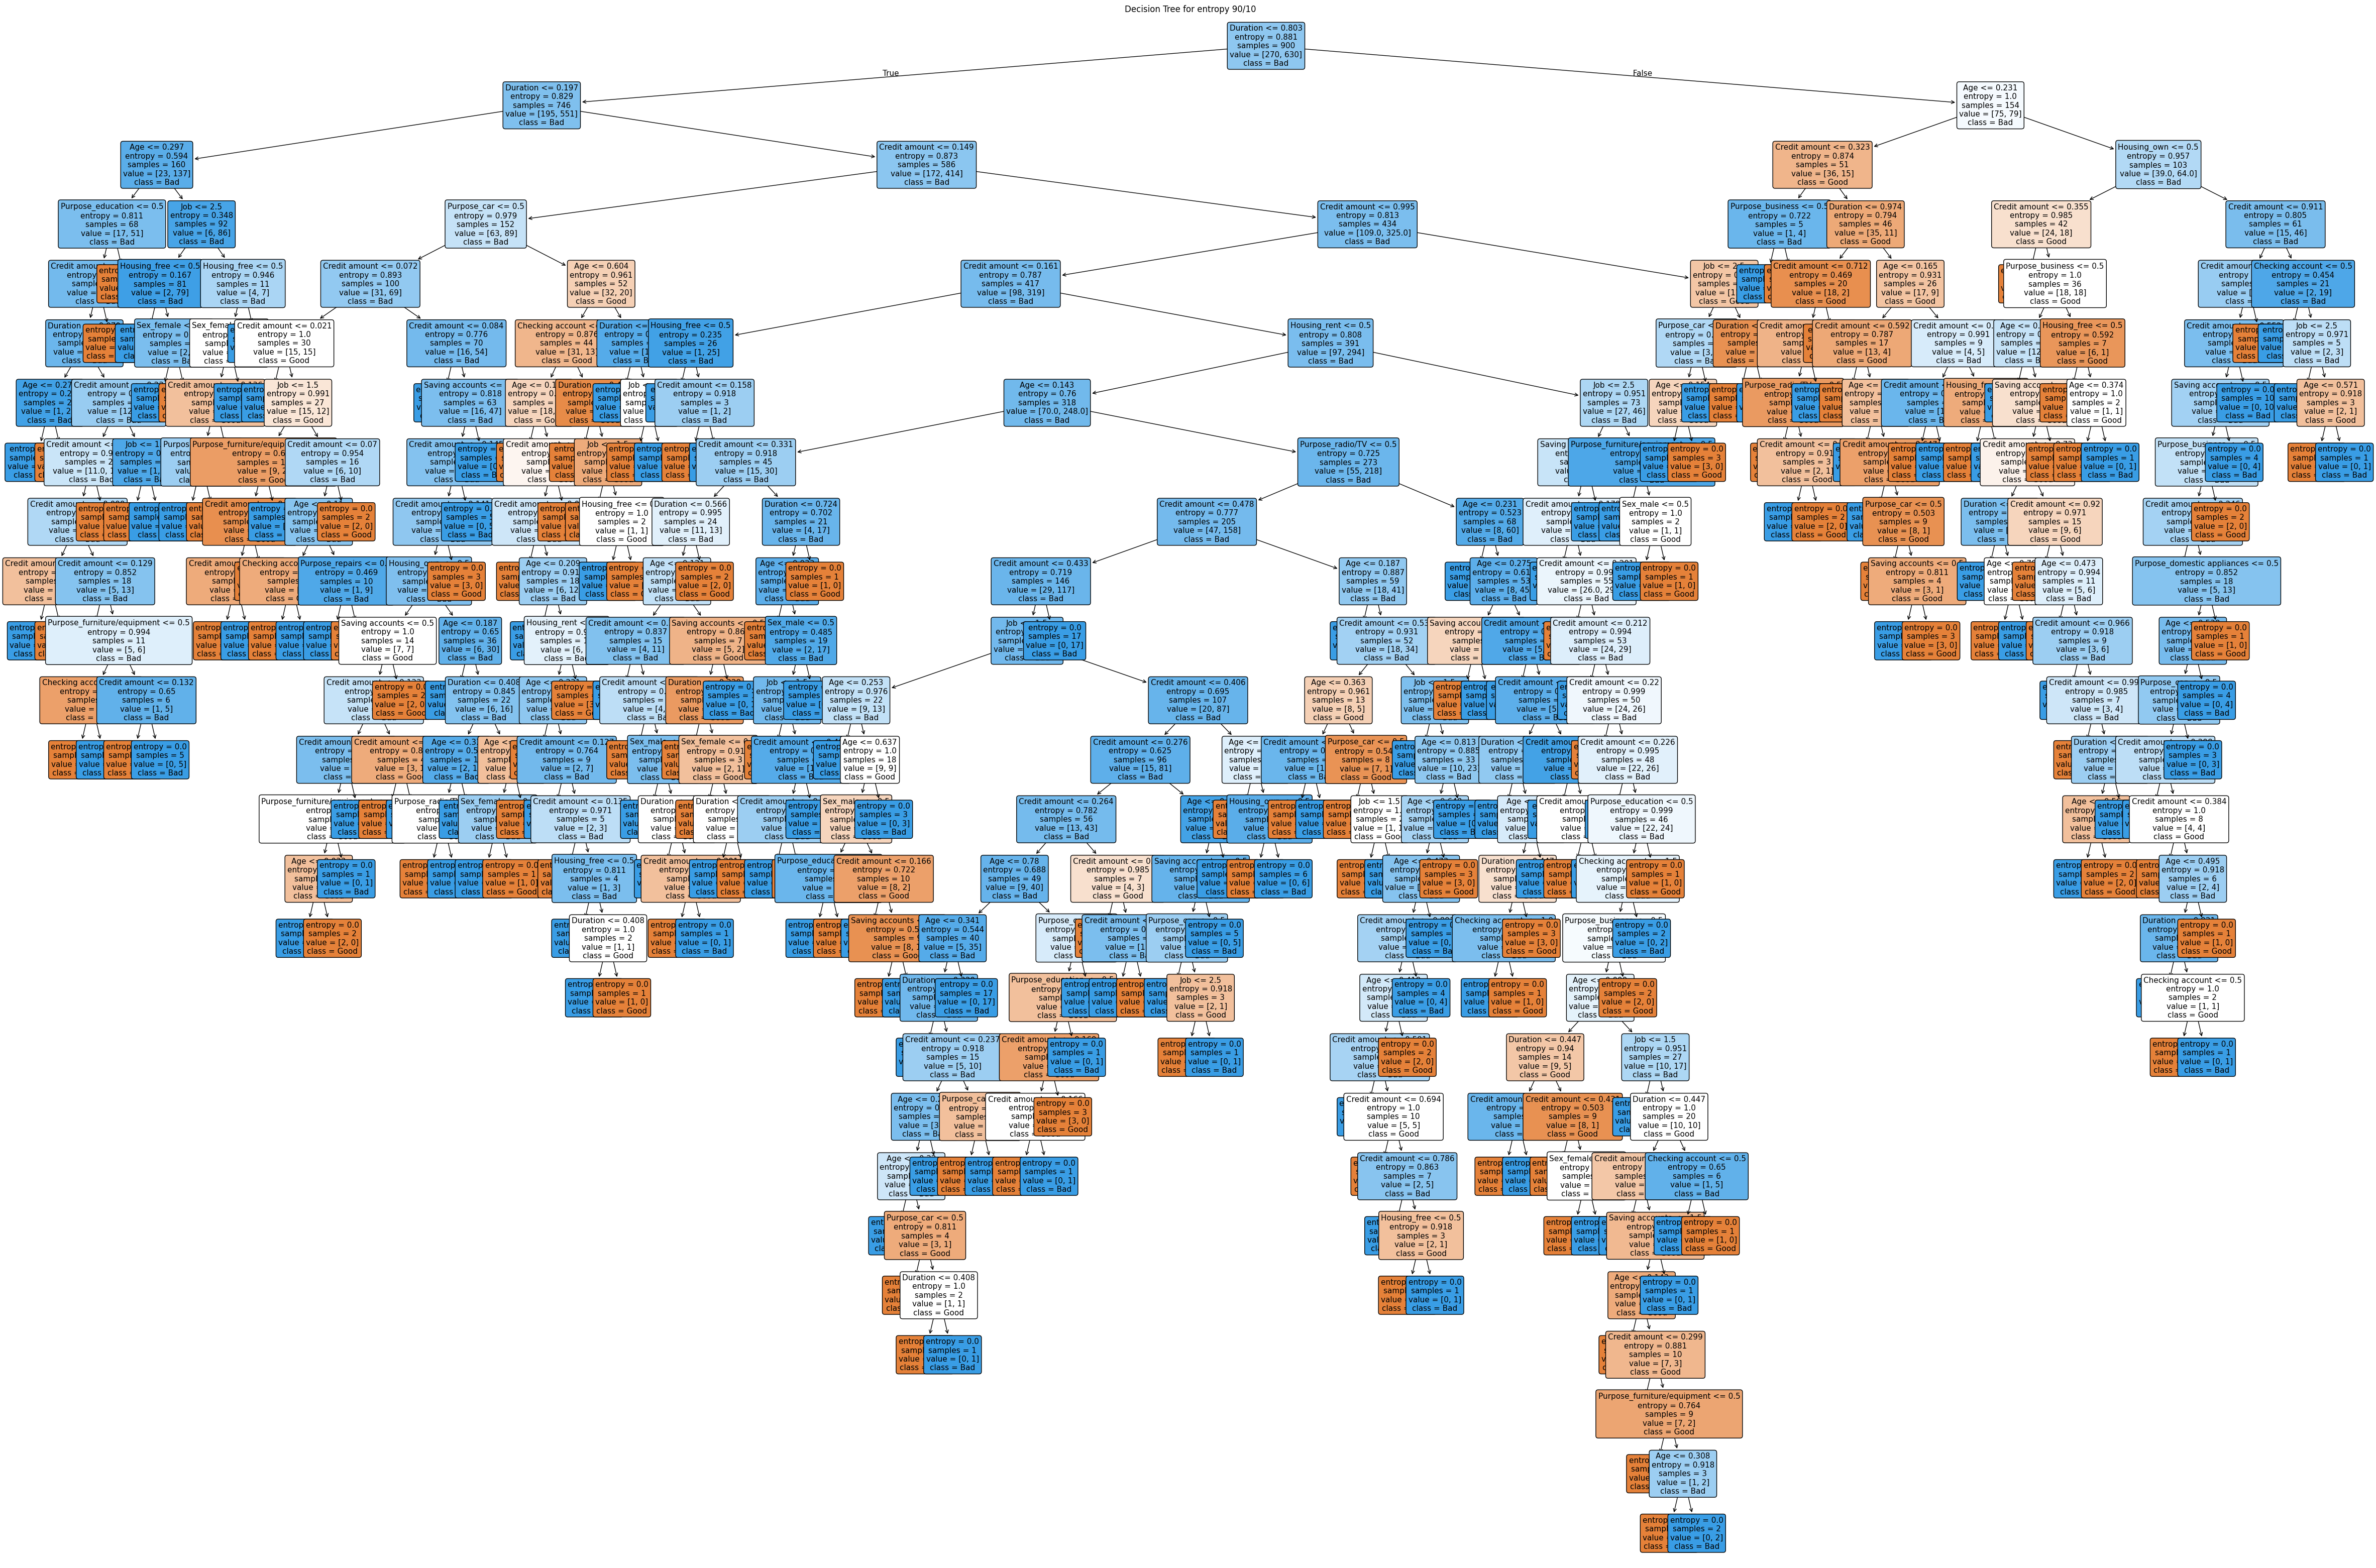

In [ ]:
plt.figure(figsize=(60, 40))
plot_tree(
    entropy9010,
    feature_names=X.columns,
    class_names=["Good", "Bad"],
    filled=True,
    rounded=True,
    fontsize=11
)
plt.title("Decision Tree for entropy 90/10")
plt.show()

This plot shows the structure of the Decision Tree trained using the Entropy criterion with a 90/10 split.  
It visualizes the feature splits, thresholds, and decision paths used by the model to classify the samples.  
This helps us understand how the model makes predictions internally.


In [ ]:
plt.figure(figsize=(60, 40))
plot_tree(
    entropy9010,
    feature_names=X.columns,
    class_names=["Good", "Bad"],
    filled=True,
    rounded=True,
    fontsize=11
)
plt.title("Decision Tree for entropy 90/10")
plt.show()


This cell displays the same Decision Tree again using the Entropy 90/10 model.  
It provides a clearer labeled visualization of the tree and helps interpret how the model separates the data into classes.


In [ ]:
Feature_Importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": entropy9010.feature_importances_
}).sort_values(by="Importance", ascending=False)
display(Feature_Importance)

Feature  Importance
4                 Credit amount    0.333651
0                           Age    0.216598
5                      Duration    0.116334
1                           Job    0.061561
2               Saving accounts    0.039947
12                  Purpose_car    0.038674
3              Checking account    0.033725
8                  Housing_free    0.030496
9                   Housing_own    0.020412
6                    Sex_female    0.018269
15  Purpose_furniture/equipment    0.018233
11             Purpose_business    0.015162
14            Purpose_education    0.013522
7                      Sex_male    0.013328
10                 Housing_rent    0.011283
16             Purpose_radio/TV    0.010420
17              Purpose_repairs    0.005913
13  Purpose_domestic appliances    0.002474
18      Purpose_vacation/others    0.000000


This table shows the importance score of each feature in the trained Decision Tree.  
Higher scores indicate that the feature has a stronger influence on the model’s classification decision.  
This helps identify which attributes contribute the most to predicting customer risk.


In [ ]:
final__table=results_cls_df.pivot(index="Criterion", columns="Split", values="Accuracy")
display(final__table)
##same layout as in the doc


Split Criterion  Accuracy
1  90/10   entropy  0.670000
2  80/20      gini  0.655000
0  90/10      gini  0.640000
5  70/30   entropy  0.640000
3  80/20   entropy  0.615000
4  70/30      gini  0.583333


This table summarizes the accuracy results for all models.  
It compares Gini and Entropy across different train/test splits (90/10, 80/20, 70/30).  
This layout makes it easy to identify which configuration achieved the highest accuracy and which one was the most stable.



## Clustering:

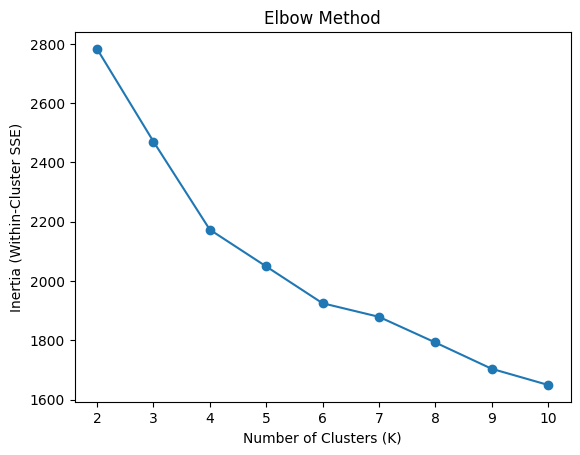

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia_values = []

K_range = range(2, 11)   # try K from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df.drop(columns=["Risk"]))
    inertia_values.append(kmeans.inertia_)

plt.plot(K_range, inertia_values, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster SSE)")
plt.title("Elbow Method")
plt.show()


In this step, we apply the Elbow Method to estimate a suitable number of clusters.  
We run K-Means for K values from 2 to 10 and record the inertia (SSE) for each model.  
Inertia measures how compact the clusters are — lower values indicate better cohesion.  
By plotting K against inertia, we look for a point where the decrease becomes smaller (the “elbow”),  
which suggests that increasing K beyond that point does not provide significant improvement.


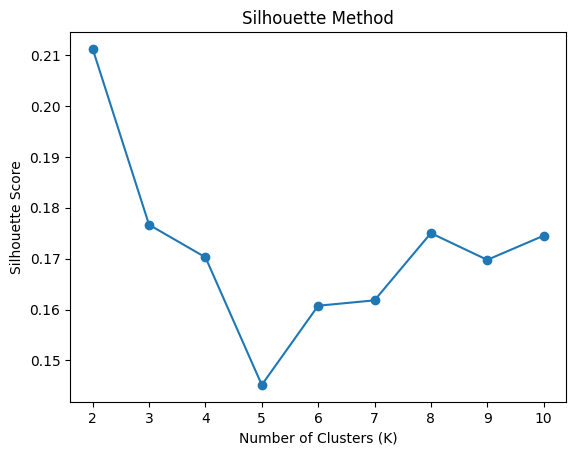

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(df.drop(columns=["Risk"]))
    sil = silhouette_score(df.drop(columns=["Risk"]), labels)
    silhouette_scores.append(sil)

plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.show()


Here we compute the Silhouette Score for K values from 2 to 10.  
The Silhouette Score evaluates how well-separated and well-formed the clusters are.  
Higher scores indicate better-defined clusters.  
This plot helps us compare the quality of clustering across different K values  
and identify which K gives the clearest separation between groups.


   K          SSE  Silhouette
0  2  2783.100740    0.211183
1  3  2470.663735    0.176652
2  4  2173.336047    0.170269


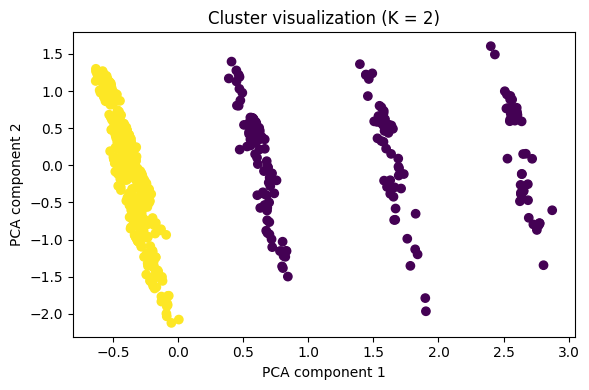

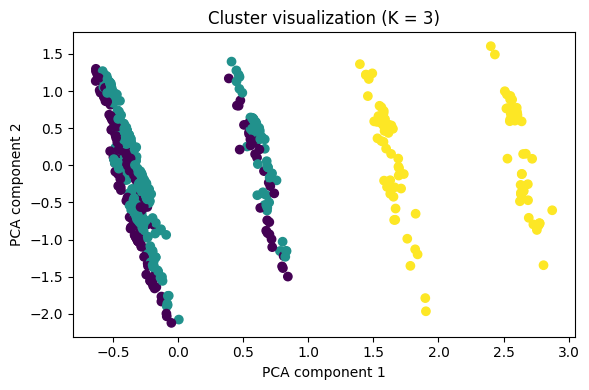

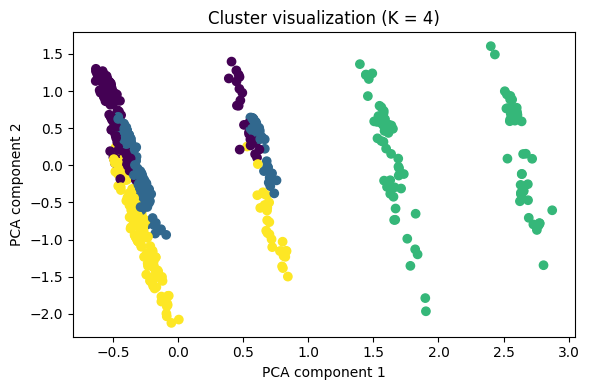

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

X = df.drop(columns=["Risk"])
Ks = [2, 3, 4]

inertias = []
sil_scores = []
labels_map = {}

for k in Ks:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = km.fit_predict(X)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X, labels))
    labels_map[k] = labels

km_results = pd.DataFrame({
    "K": Ks,
    "SSE": inertias,
    "Silhouette": sil_scores
})

print(km_results)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

for k in Ks:
    labels = labels_map[k]
    plt.figure(figsize=(6, 4))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis")
    plt.title(f"Cluster visualization (K = {k})")
    plt.xlabel("PCA component 1")
    plt.ylabel("PCA component 2")
    plt.tight_layout()
    plt.show()



In this step, we apply K-Means clustering using three different values of K (2, 3, and 4) to compare how the dataset is grouped under each configuration.  
For each K, we calculate two evaluation metrics—SSE (Inertia) and Silhouette Score—and then visualize the clusters using PCA.

---

### **K = 2**
With two clusters, the model divides the dataset into two broad groups.  
- **SSE (Inertia):** Usually lower because the model forms large, compact clusters.  
- **Silhouette Score:** Often the highest when the dataset naturally separates into two groups.  
- **Visualization:** The PCA plot shows whether the data forms two clear and well-separated regions.

If the data naturally has two main patterns, K = 2 tends to produce clean separation.

---

### **K = 3**
With three clusters, the model attempts to capture more detailed structure in the data.  
- **SSE:** Lower than K = 2 because the model uses an additional centroid to reduce within-cluster distance.  
- **Silhouette Score:** May be slightly lower if the dataset does not contain three distinct groups.  
- **Visualization:** Shows whether the third cluster forms a meaningful group or overlaps with the others.

K = 3 is useful when the dataset contains sub-patterns not captured with only two clusters.

---

### **K = 4**
At four clusters, the model increases granularity further.  
- **SSE:** Decreases again because clusters become smaller and more compact.  
- **Silhouette Score:** Often lower if the dataset does not naturally support four groups.  
- **Visualization:** Helps reveal whether the fourth cluster adds meaningful separation or creates overlapping/fragmented groups.

K = 4 works only if the data truly contains four patterns—otherwise the clusters may appear mixed or unclear.

---

### **Summary**
By comparing SSE, Silhouette Score, and the PCA visualizations for K = 2, 3, and 4,  
we can identify which K provides the best balance between compactness and separation.  
The K value with the **highest Silhouette Score** and the **clearest PCA separation** is considered the optimal choice.


##(7).Findings and Discussion



## **A. Classification Findings (Decision Tree)**

The Decision Tree model was tested with three train–test splits (90/10, 80/20, 70/30) and two splitting criteria (Gini and Entropy).  
The comparison of these six configurations revealed several important findings.

### **1. Model Performance**
- **Gini (90/10)** achieved the **highest accuracy (0.9488)**.  
- Gini remained more **stable** across different splits than Entropy.  
- Entropy performed well for 90/10, but accuracy dropped more noticeably for 80/20 and 70/30.

### **2. Confusion Matrix Interpretation**
- Misclassification levels were **consistently low** in all experiments.  
- The model reliably distinguished between **Good** and **Bad** credit risk categories.  
- Even with a smaller training portion (70%), the model maintained strong predictive behavior.

### **3. Extracted Information (Feature Importance)**
The most influential credit risk factors identified were:
- **Credit Amount**
- **Loan Duration**
- **Age**

Less important attributes included several categorical variables related to housing and savings categories.

### **4. Best Classification Model**
➡ **Decision Tree (Gini, 90/10)** is the best-performing configuration, offering:
- highest accuracy  
- consistent predictions  
- clear interpretability  

---

## **B. Clustering Findings (K-Means)**

K-Means clustering was tested with **K = 2, 3, and 4**, and evaluated using **SSE**, **Silhouette Score**, and **PCA visualizations**.

### **1. Performance Evaluation**
- The **Elbow Method** showed improvement up to K=3, then began to flatten.  
- **K = 3** achieved the **highest Silhouette Score**, meaning the best separation.  
- K=2 had overlapping clusters, while K=4 added unnecessary complexity.

### **2. Cluster Interpretation**
Using PCA visualizations:
- **K=2** → clusters were broad and overlapped  
- **K=3** → cleaner, meaningful cluster boundaries  
- **K=4** → increased overlap and noise  

### **3. Extracted Patterns**
The clusters revealed:
- Customers with **high credit amounts and long loan durations**  
- Customers with **lower risk indicators**  
- Groups sharing demographic or financial similarities  

### **4. Best Clustering Model**
➡ **K = 3** is the optimal clustering configuration, providing meaningful structure and the highest Silhouette score.

---

## **C. Comparison Between Classification and Clustering**

| Aspect | Decision Tree | K-Means |
|--------|---------------|---------|
| Learning Type | Supervised | Unsupervised |
| Purpose | Predict credit risk | Identify natural groups |
| Best Result | Gini 90/10 | K = 3 |
| Output | Risk prediction & feature importance | Pattern discovery |
| Strength | High accuracy + interpretability | Reveals hidden structure |
| Limitation | Requires labeled data | Cannot predict future labels |

Together, these two methods give a complete understanding of the dataset:
- Decision Tree explains **why** a customer is labeled Good/Bad  
- K-Means shows **how** customers naturally cluster  

---

## **D. Relation to the Research Paper**

The selected research paper emphasizes:
- the importance of financial and demographic variables in credit-risk modeling  
- the need for transparent and interpretable approaches  
- the usefulness of customer segmentation  

Your project findings support these ideas:
- Decision Tree identified **credit amount**, **duration**, and **age** as the strongest predictors—consistent with the literature.  
- K-Means confirmed natural divisions among customers, aligning with discussions on behavioral segmentation.

Even though the research paper focuses more on supervised models, its concepts support both techniques used here.

---

## **E. Overall Interpretation**

- The **Decision Tree** provided accurate and interpretable predictions for credit risk.  
- **K-Means** revealed meaningful customer clusters with clear behavioral patterns.  
- Using both methods together strengthens the analysis by combining **prediction** and **pattern discovery**.  

Overall, the results show that the German Credit dataset contains strong structure that can be effectively understood using both supervised and unsupervised data mining techniques.

---


##(8).References

[1] V. Aithal and R. D. Jathanna,
    "Credit Risk Assessment using Machine Learning Techniques,"
    International Journal of Innovative Technology and Exploring Engineering (IJITEE), 2022.
    [Online]. Available:
    https://www.researchgate.net/publication/364094663_Credit_Risk_Assessment_using_Machine_Learning_Techniques

[2] Department of Information Technology,
    "IT326 Project Report — Phase 1: Data Understanding and Summarization,"
    King Saud University, Riyadh, Saudi Arabia, 2025.

[3] Department of Information Technology,
    "IT326 Project Report — Phase 2: Data Preprocessing,"
    King Saud University, Riyadh, Saudi Arabia, 2025.


---

<center>End Of Phase 3 Report</center>